In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
%config InlineBackend.figure_format = 'png'
%matplotlib inline
from collections import Counter

In [2]:
airbnb_1 = pd.read_csv('airbnb.csv')

In [3]:
price = airbnb_1['price']
#prices = []

In [4]:
sum_price = sum(airbnb_1.price)
number_price = len(airbnb_1.price)
average_price = sum_price / number_price
average_price

141.68799817809156

In [6]:
room_type=airbnb_1.groupby('room_type').property_id.count()
room_type=room_type.reset_index()
room_type=room_type.rename(columns={'property_id':'number_Of_Listings'})
room_type

,room_type,number_Of_Listings
0,Entire home/apt,1907
1,Private room,2168
2,Shared room,316


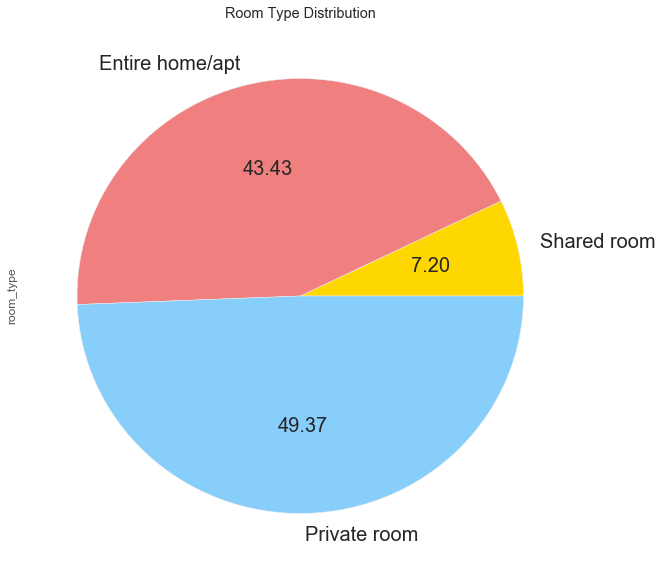

In [7]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

room = airbnb_1.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']

sliceColors = [ 'gold', 'lightcoral', 'lightskyblue']
room_df.plot.pie(y = 'room_type', 
                 colors=sliceColors, 
                 figsize=(10,10), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

#room_df = airbnb_1.groupby('room_type').id.count()
#room_df = room_df.reset_index()
#room_df=room_df.rename(columns={'id':'Number_Of_Listings'})

#objects = room_df['room_type']
#y_pos = room_df['Number_Of_Listings']

#room_df.plot(kind='bar', 
#           x='room_type',
#           y='Number_Of_Listings',
#           color = '#66c2ff', 
#           figsize =(15,8), 
#           title = 'Santa Clara County Property Type Frequency', 
#           legend = False)
#plt.ylabel('property type')
#plt.ylabel('Number of listings')

In [8]:
property_type=airbnb_1.groupby('property_type').property_id.count()
property_type=property_type.reset_index()
property_type=property_type.rename(columns={'property_id':'number_Of_Listings'})
property_type = property_type.sort_values(by=['number_Of_Listings'],ascending=False)
property_type

,property_type,number_Of_Listings
15,House,2350
0,Apartment,798
22,Townhouse,316
14,Guesthouse,220
13,Guest suite,192
9,Condominium,189
4,Bungalow,100
19,Serviced apartment,59
25,Villa,45
17,Loft,26


Text(0,0.5,'Number of listings')

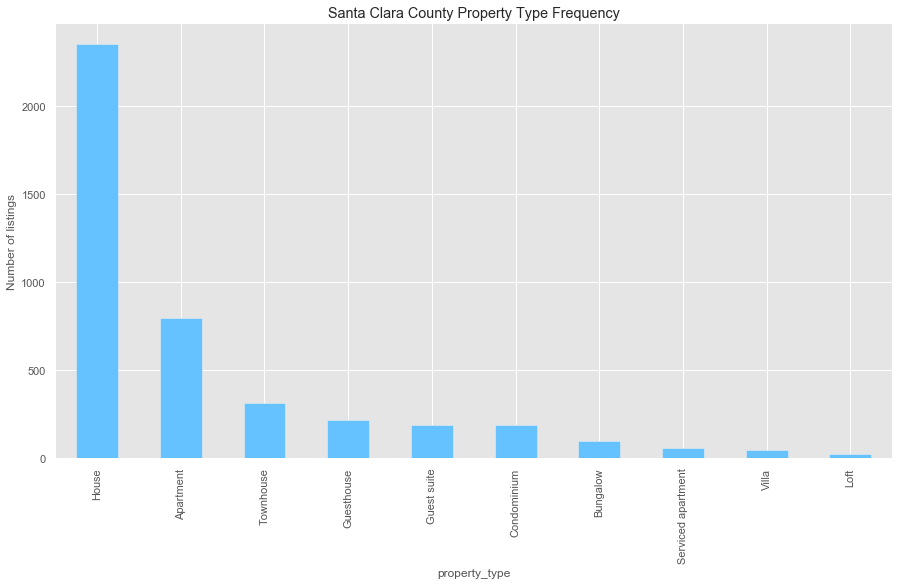

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

property_type = airbnb_1.groupby('property_type').property_id.count()
property_type = property_type.reset_index()
property_type=property_type.rename(columns={'property_id':'Number_Of_Listings'})
property_type = property_type.sort_values(by=['Number_Of_Listings'],ascending=False)
property_type = property_type.iloc[0:10]

objects = property_type['property_type']
y_pos = property_type['Number_Of_Listings']

property_type.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Santa Clara County Property Type Frequency', 
           legend = False)
plt.ylabel('property type')
plt.ylabel('Number of listings')

In [10]:
# analyzing the prices for different room type and property type

room_property = airbnb_1.groupby(['property_type','room_type']).price.mean()
room_property = room_property.reset_index()
room_property=room_property.sort_values('price',ascending=[0])
room_property.head()

,property_type,room_type,price
34,Other,Shared room,2900.000000
44,Villa,Entire home/apt,1192.416667
26,House,Entire home/apt,317.675896
7,Bungalow,Entire home/apt,252.833333
30,Loft,Entire home/apt,233.208333


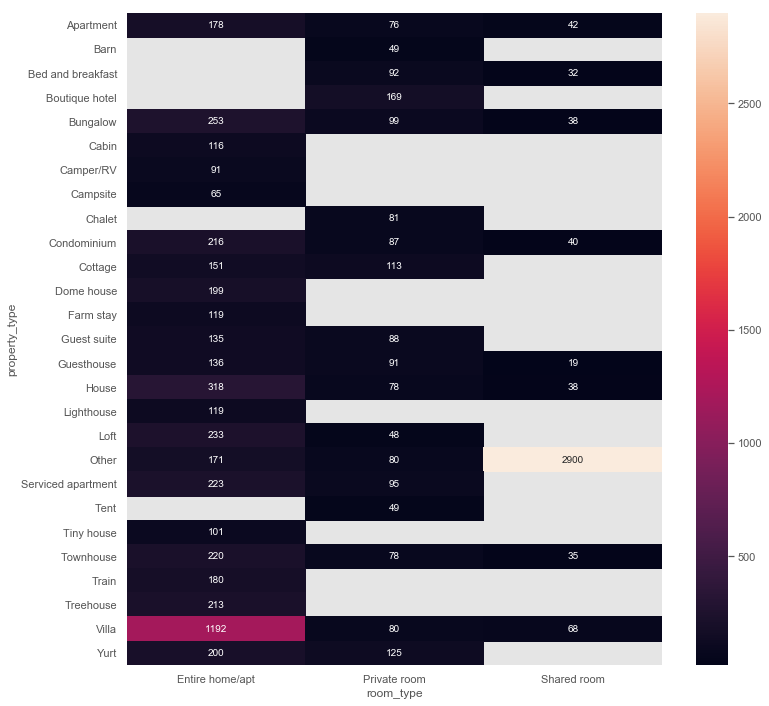

In [11]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(airbnb_1.groupby([
        'property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")

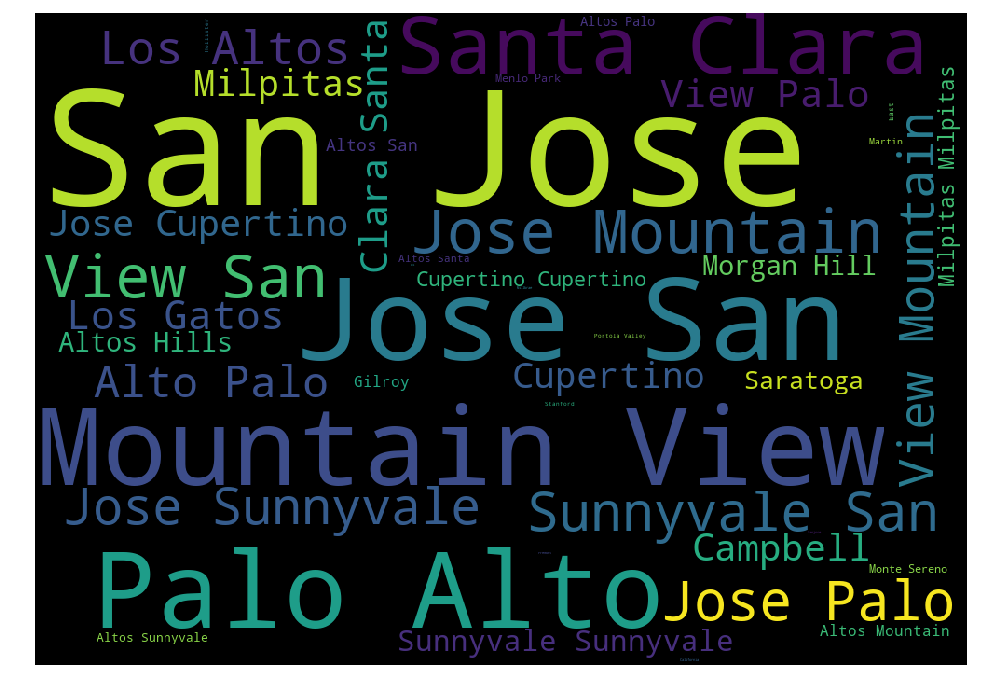

In [12]:
# city word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
cities=[]
for i in airbnb_1.city:
    
    cities.append(i)
a=' '.join(cities[:5500])
wordcloud = WordCloud(width = 1000, height = 700).generate(a)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

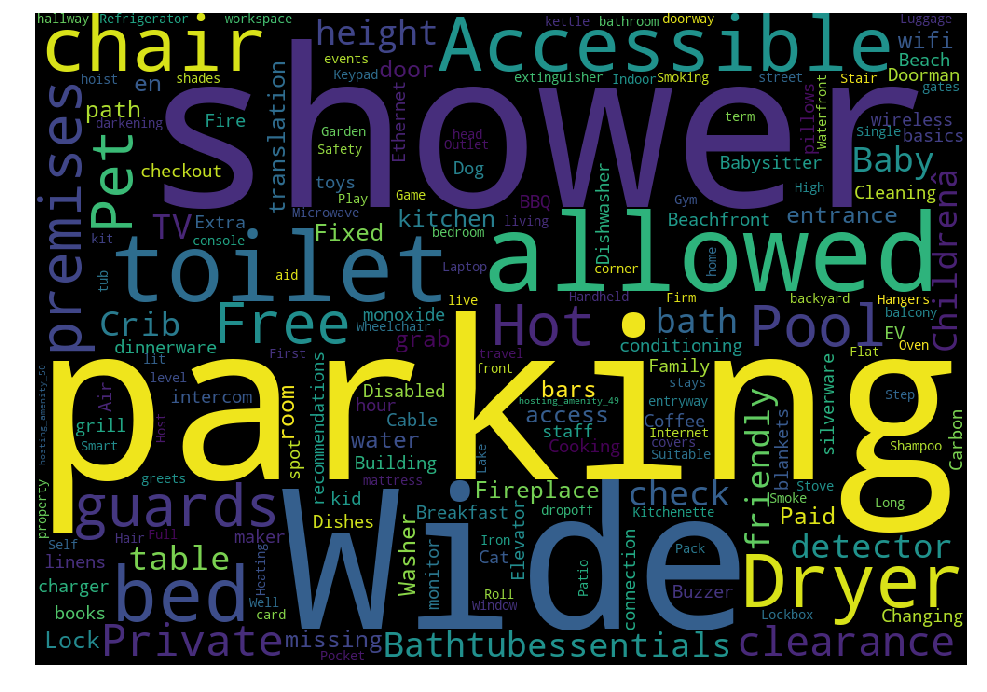

In [13]:
# amenities word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
#airbnb_1['amenities'].head()
#airbnb_1['amenities'].map(lambda amns: amns.split("|")).head()
airbnb_1['amenities'] = airbnb_1['amenities'].map(
    lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amns.split(",")]))
np.concatenate(airbnb_1['amenities'].map(lambda amns: amns.split("|")).values)
b = np.unique(np.concatenate(airbnb_1['amenities'].map(lambda amns: amns.split("|")).values))
c=' '.join(b)
wordcloud = WordCloud(width = 1000, height = 700).generate(c)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [21]:
airbnb_2 = pd.read_csv('Airbnb总表.csv')
columns_to_keep = ["price", "neighbourhood_cleansed", "bedrooms",
                   "property_type", "room_type", "name", "summary",
                   "amenities", "latitude", "longitude", "number_of_reviews",
                   "require_guest_phone_verification", "minimum_nights"]

airbnb_2 = airbnb_2[columns_to_keep]

In [22]:
def clean(train):

    train["bedrooms"] = train["bedrooms"].fillna(0.5) #these are studios
    train["summary"] = train["summary"].fillna("")
    train["bedrooms"] = train["bedrooms"].astype("str")

    #replace unpopular types with other 
    popular_types = train["property_type"].value_counts().head(6).index.values
    train.loc[~train.property_type.isin(popular_types), "property_type"] = "Other"

    #make price numeric:
    train["price"] = train["price"].str.replace("[$,]", "").astype("float")
    #eliminate crazy prices:
    train = train[train["price"] < 600]
    
    return train
airbnb_2 = clean(airbnb_2)

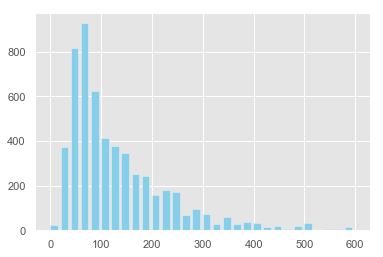

In [25]:
# prices distribution
airbnb_2["price"].hist(bins = 30,width=15, color='skyblue')

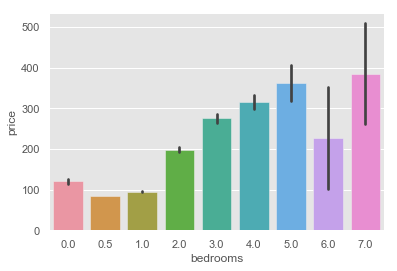

In [26]:
#bedrooms distribution
sns.barplot(x = "bedrooms", y = "price", data = airbnb_2)

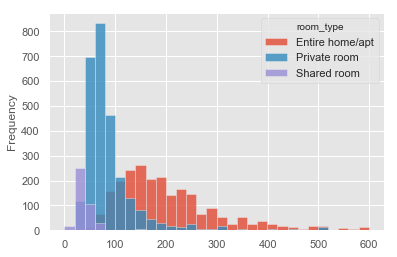

In [27]:
#room_type distribution
(airbnb_2.pivot(columns = "room_type", values = "price")
         .plot.hist(bins = 30, stacked = False, alpha = 0.8))